<a href="https://colab.research.google.com/github/Dheerajthummala/Random_Forest/blob/main/Randomforest(fraudcheck).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
# as per given
cut=[0,30000,100000]
label=['risky','good']
data["tax"]=pd.cut(x=data['Taxable.Income'],bins=cut,labels=label)
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [12]:
# changing categorical data into numerical
from sklearn import preprocessing
data2=data.copy()
label_encoder = preprocessing.LabelEncoder()
data2['Undergrad']= label_encoder.fit_transform(data2['Undergrad'])
data2['Marital.Status']= label_encoder.fit_transform(data2['Marital.Status'])
data2['Urban']= label_encoder.fit_transform(data2['Urban'])
data2['tax']= label_encoder.fit_transform(data2['tax'])

In [13]:
data2.drop('Taxable.Income',axis=1,inplace=True)
data2.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   tax              600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'Marital.Status'}>],
       [<Axes: title={'center': 'City.Population'}>,
        <Axes: title={'center': 'Work.Experience'}>],
       [<Axes: title={'center': 'Urban'}>,
        <Axes: title={'center': 'tax'}>]], dtype=object)

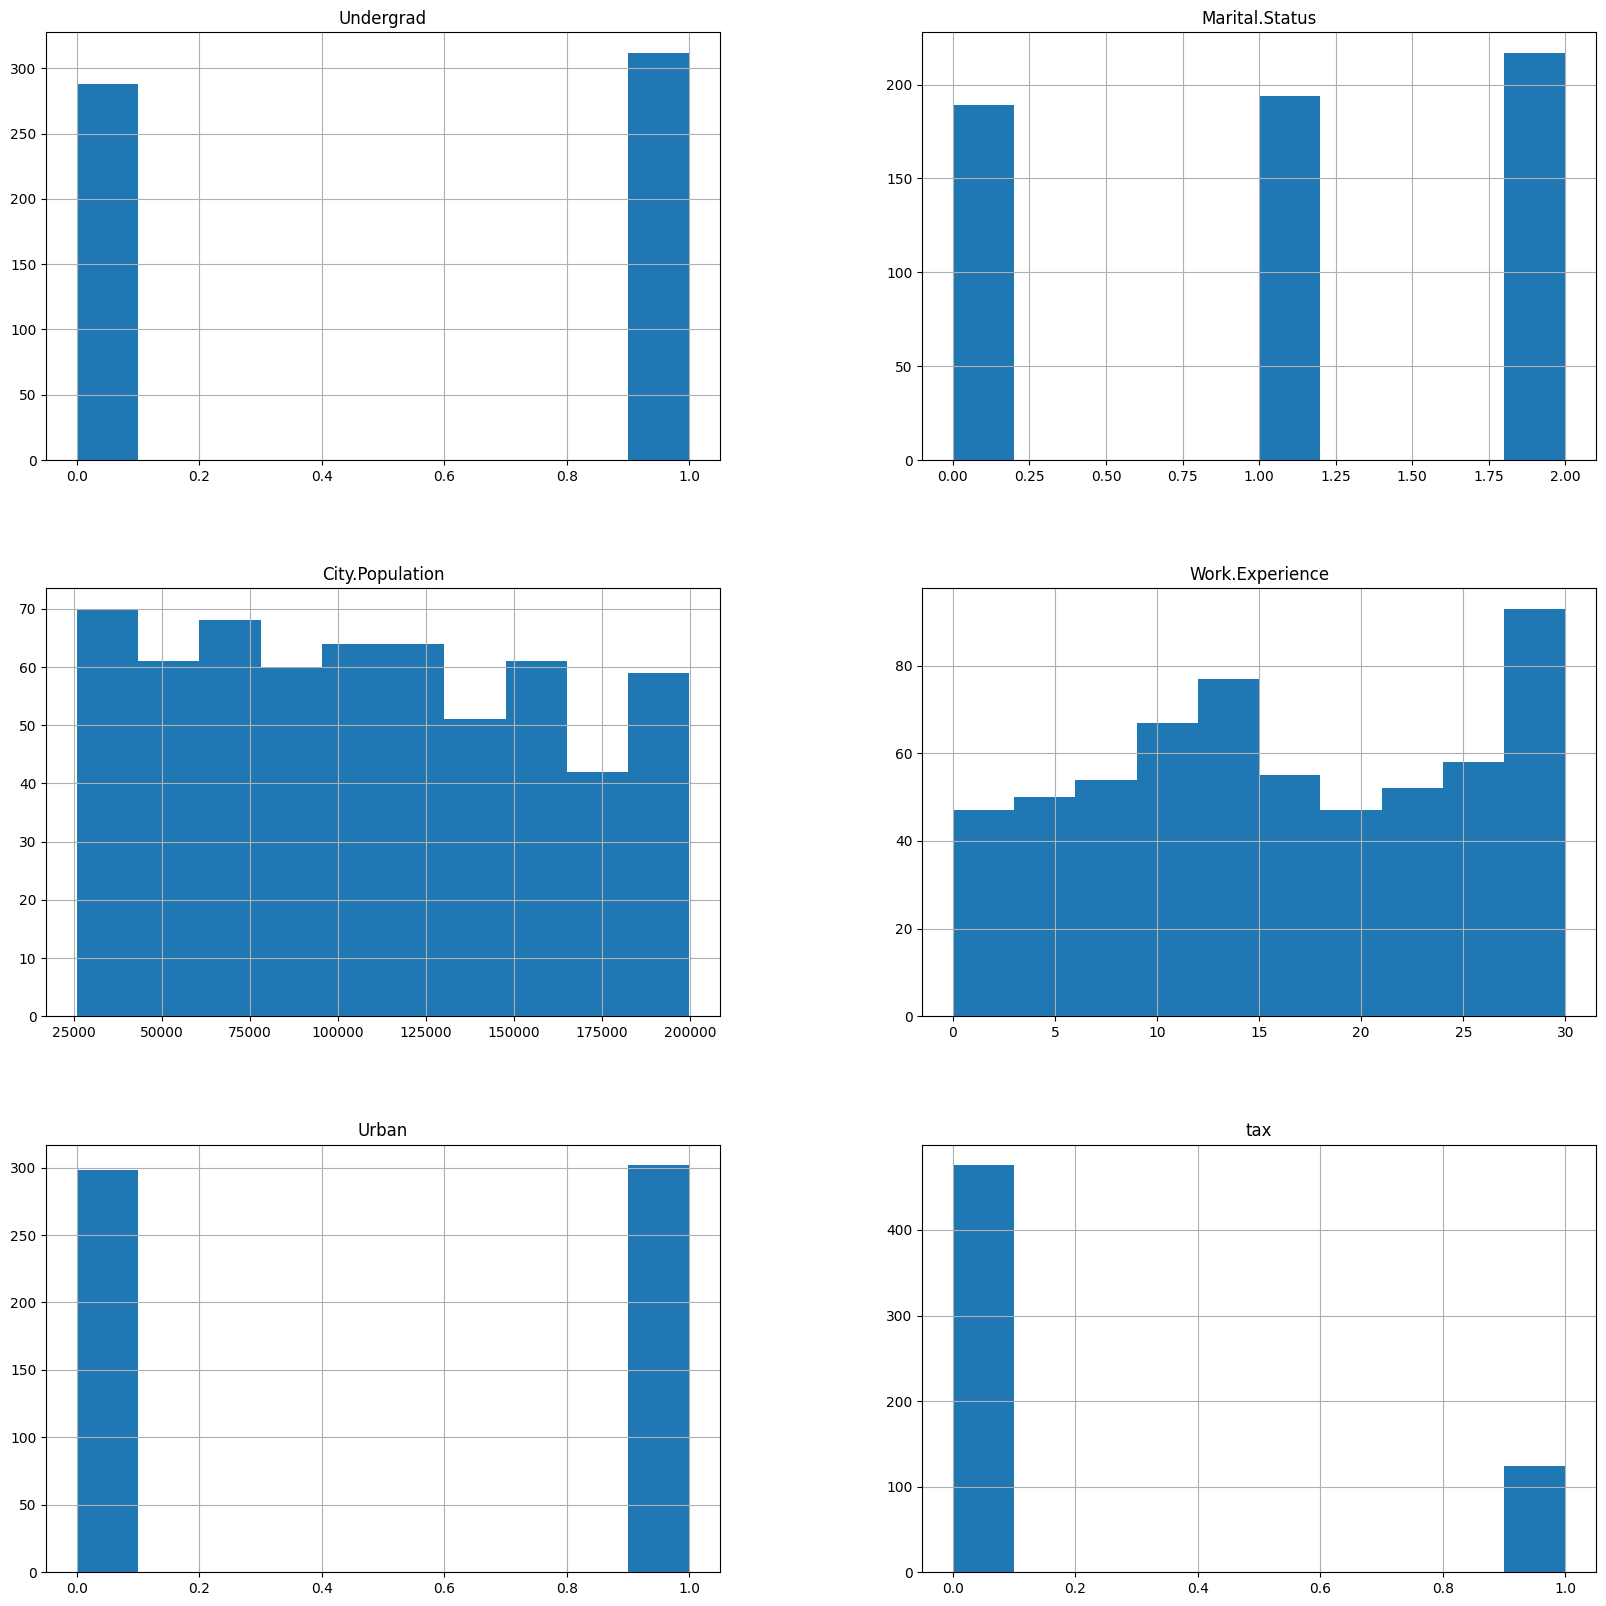

In [19]:
data2.hist(linewidth=1.2, figsize=(20, 20))

In [15]:
X=data2.iloc[:,0:5]
Y=data2.iloc[:,5]
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [16]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax, Length: 600, dtype: int64

In [23]:
Y.value_counts()

0    476
1    124
Name: tax, dtype: int64

In [26]:
# bagging classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [28]:
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
des = DecisionTreeClassifier()
num = 100
model = BaggingClassifier(base_estimator=des, n_estimators=num, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7316666666666667


In [29]:
model.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [35]:
ensemble=pd.DataFrame()
ensemble['actual_y']=Y

In [38]:
y_bpred=model.predict(X)
ensemble['bagpred_y']=y_bpred
ensemble.head()

,actual_y,bagpred_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [43]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
max_features=3
model2 = RandomForestClassifier(n_estimators=num, max_features=max_features, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7416666666666667


In [44]:
model2.fit(X,Y)

RandomForestClassifier(max_features=3, random_state=42)

In [47]:
rand_y=model2.predict(X)

In [49]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [51]:
model3 = AdaBoostClassifier(n_estimators=num, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7416666666666667


In [53]:
model3.fit(X,Y)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [54]:
ada_y=model3.predict(X)

In [56]:
ensemble["adaboost_predict"]=ada_y
ensemble["randaomforest_predict"]=rand_y
ensemble

,actual_y,bagpred_y,adaboost_predict,randaomforest_predict
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
595,0,0,0,0
596,0,0,0,0
597,0,0,0,0
598,0,0,0,0
